In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import callbacks
import matplotlib.pyplot as plt
import numpy as np
#Disable GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [15]:
def getData():
    df = pd.read_csv("data/data.csv")
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace = True, drop=True)
    data= df["Cumulative_solar_power"].diff()
    data = data[data.index > "2012"]
    return data

def getGenerator(data, n_input=3, batch_size=1):
    data = np.reshape(data.values, (-1, 1))
    return TimeseriesGenerator(data, data, length=n_input, batch_size=batch_size)

def tryLeightweightModel(data, n_input=3, batch_size=1):
    generator = getGenerator(data, n_input, batch_size)

    early_stopping = callbacks.EarlyStopping(
        min_delta=0.05, # minimium amount of change to count as an improvement
        patience=10, # how many epochs to wait before stopping
        restore_best_weights=True,
    )

    model = Sequential()
    model.add(LSTM(64, input_shape=(n_input,1), return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dense(8))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    history = model.fit(generator, epochs = 100, verbose=0, callbacks=[early_stopping])
    return model, history

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(n_input,1)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
history = model.fit(generator, epochs = 75, verbose=0)

In [ ]:
history.history["loss"]

In [ ]:
plt.plot(history.history["loss"])

Loss value is still jumping, adding more layers and running more epochs. 

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(n_input,1), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(generator, epochs = 100, verbose=2)

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
#save the model 
model.save("models/lstm_128_64_e100")

Lets try and see how the qaulity is influenced when we lower the data amount

In [ ]:
df = pd.read_csv("data/data.csv")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True, drop=True)
data= df["Cumulative_solar_power"].diff()
data = data[data.index > "2012"]
data = data[data.index < "2015"]

In [ ]:

data = dn = np.reshape(data.values, (-1, 1))

In [ ]:
n_input  = 3
generator = TimeseriesGenerator(data, data, length=n_input, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(n_input,1), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(generator, epochs = 100, verbose=2)

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(n_input,1), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(generator, epochs = 100, verbose=2)
plt.plot(history.history["loss"])

In [16]:
df = getData()

In [17]:
#Baseline
model, hist = tryLeightweightModel(df)


[23.656450271606445, 23.372325897216797, 23.42458724975586, 23.431867599487305, 23.245601654052734]


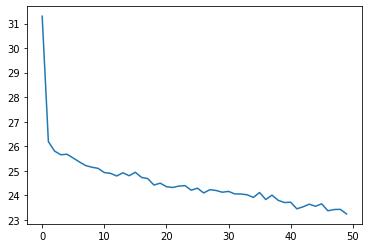

In [28]:
plt.plot(hist.history["loss"])
print(hist.history["loss"][-5:])

In [37]:
df.values.reshape(-1, 1) 

array([[0.8],
       [2.9],
       [0.8],
       ...,
       [8. ],
       [5. ],
       [3. ]])

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1) )

[23.816740036010742, 23.783838272094727, 23.706764221191406, 23.856117248535156, 23.781017303466797]


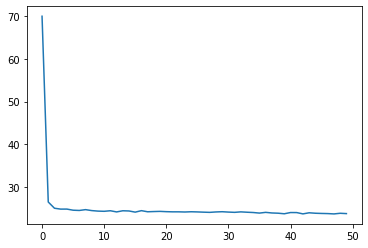

In [42]:
#Baseline
model, hist = tryLeightweightModel(df, batch_size=16)
plt.plot(hist.history["loss"])
print(hist.history["loss"][-5:])

[23.46689224243164, 23.581405639648438, 23.487699508666992, 23.442554473876953, 23.52366065979004]


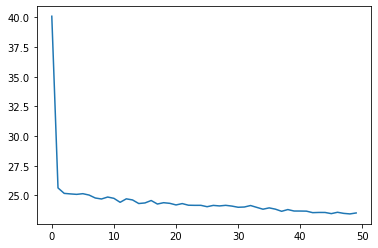

In [43]:
#Baseline
model, hist = tryLeightweightModel(df, batch_size=4)
plt.plot(hist.history["loss"])
print(hist.history["loss"][-5:])

[23.338289260864258, 23.371122360229492, 23.25519561767578, 23.28557777404785, 23.24698829650879]


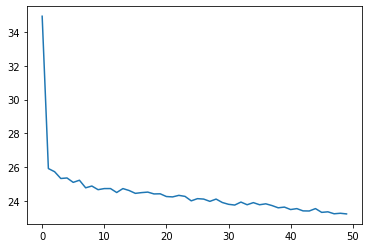

In [44]:
#Baseline
model, hist = tryLeightweightModel(df, batch_size=2)
plt.plot(hist.history["loss"])
print(hist.history["loss"][-5:])